In [204]:
# 准备工作

import warnings

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

%matplotlib inline

In [205]:
# 加载数据
train_tf = pd.read_csv("./datasets/train.csv")
test_tf = pd.read_csv("./datasets/test.csv")

In [206]:
train_data = train_tf.drop(["label"], axis=1)
train_label = train_tf["label"]

In [207]:
X_train, X_test, y_train,  y_test = train_test_split(train_data, train_label, test_size=0.01, random_state=42)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


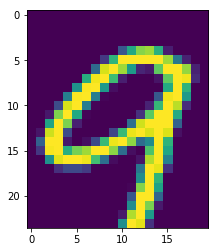

In [208]:
# 定义函数查看图片
def plot_digit(data):
    image = data.reshape(28, 28)
    image = image[2:26, 4:24]
    plt.imshow(image)
plot_digit(X_train.iloc[3])

In [210]:
# 自定义转换器，如上减少特征
from sklearn.base import BaseEstimator, TransformerMixin

class ImageReduce(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        return self
    def transform(self, X):
        X = X.values
        m, n = X.shape
        X_result = np.zeros([m, 480])
#         print(X_result.shape)
        for i in range(0, m):
            X_28 = X[i,:].reshape(28, 28)
            X_28 = X_28[2:26, 4:24]
            X_result[i,:] = X_28.reshape(1, -1)
        return pd.DataFrame(X_result)

In [211]:
# pipeline 
from sklearn.preprocessing import StandardScaler
full_pipeline = Pipeline([
#     ("reduce", ImageReduce()),
    ("std_scalar", StandardScaler())
])

In [212]:
X_train_480 = full_pipeline.fit_transform(X_train)

In [213]:
# 使用tensorflow进行训练
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_480)
# feature_columns
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[700, 200], n_classes=10, feature_columns=feature_columns)
dnn_clf.fit(x=X_train_480, y=y_train, batch_size=50, steps=30000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c9389bf60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpjs0fcf06'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc00

INFO:tensorflow:global_step/sec: 197.597
INFO:tensorflow:loss = 0.0008771652, step = 6901 (0.506 sec)
INFO:tensorflow:global_step/sec: 198.895
INFO:tensorflow:loss = 0.00028782175, step = 7001 (0.503 sec)
INFO:tensorflow:global_step/sec: 196.828
INFO:tensorflow:loss = 0.003012708, step = 7101 (0.508 sec)
INFO:tensorflow:global_step/sec: 197.979
INFO:tensorflow:loss = 0.0024896597, step = 7201 (0.505 sec)
INFO:tensorflow:global_step/sec: 198.458
INFO:tensorflow:loss = 0.00025371797, step = 7301 (0.504 sec)
INFO:tensorflow:global_step/sec: 198.333
INFO:tensorflow:loss = 0.001413939, step = 7401 (0.505 sec)
INFO:tensorflow:global_step/sec: 196.479
INFO:tensorflow:loss = 0.0011624098, step = 7501 (0.508 sec)
INFO:tensorflow:global_step/sec: 194.814
INFO:tensorflow:loss = 0.0018498801, step = 7601 (0.513 sec)
INFO:tensorflow:global_step/sec: 198.963
INFO:tensorflow:loss = 0.0019411541, step = 7701 (0.503 sec)
INFO:tensorflow:global_step/sec: 198.867
INFO:tensorflow:loss = 0.001288994, step 

INFO:tensorflow:global_step/sec: 194.439
INFO:tensorflow:loss = 0.00042998776, step = 14901 (0.515 sec)
INFO:tensorflow:global_step/sec: 189.787
INFO:tensorflow:loss = 0.00022236869, step = 15001 (0.527 sec)
INFO:tensorflow:global_step/sec: 186.15
INFO:tensorflow:loss = 0.0007435724, step = 15101 (0.537 sec)
INFO:tensorflow:global_step/sec: 182.338
INFO:tensorflow:loss = 0.0004128597, step = 15201 (0.548 sec)
INFO:tensorflow:global_step/sec: 190.115
INFO:tensorflow:loss = 0.0009934761, step = 15301 (0.526 sec)
INFO:tensorflow:global_step/sec: 192.301
INFO:tensorflow:loss = 0.0005729806, step = 15401 (0.520 sec)
INFO:tensorflow:global_step/sec: 194.82
INFO:tensorflow:loss = 0.0007936262, step = 15501 (0.513 sec)
INFO:tensorflow:global_step/sec: 196.667
INFO:tensorflow:loss = 0.0015413543, step = 15601 (0.508 sec)
INFO:tensorflow:global_step/sec: 177.276
INFO:tensorflow:loss = 0.00039730218, step = 15701 (0.565 sec)
INFO:tensorflow:global_step/sec: 178.657
INFO:tensorflow:loss = 0.000645

INFO:tensorflow:loss = 0.00019438095, step = 22801 (0.629 sec)
INFO:tensorflow:global_step/sec: 150.68
INFO:tensorflow:loss = 0.0003428317, step = 22901 (0.664 sec)
INFO:tensorflow:global_step/sec: 158.509
INFO:tensorflow:loss = 0.0001954648, step = 23001 (0.631 sec)
INFO:tensorflow:global_step/sec: 184.023
INFO:tensorflow:loss = 1.8688792e-05, step = 23101 (0.543 sec)
INFO:tensorflow:global_step/sec: 167.108
INFO:tensorflow:loss = 0.00047238305, step = 23201 (0.598 sec)
INFO:tensorflow:global_step/sec: 192.841
INFO:tensorflow:loss = 0.00022694042, step = 23301 (0.519 sec)
INFO:tensorflow:global_step/sec: 159.351
INFO:tensorflow:loss = 0.00025341468, step = 23401 (0.627 sec)
INFO:tensorflow:global_step/sec: 190.35
INFO:tensorflow:loss = 0.00022628743, step = 23501 (0.525 sec)
INFO:tensorflow:global_step/sec: 172.785
INFO:tensorflow:loss = 0.00031408397, step = 23601 (0.579 sec)
INFO:tensorflow:global_step/sec: 151.298
INFO:tensorflow:loss = 0.00037197533, step = 23701 (0.662 sec)
INFO:

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x1c9389b940>, 'hidden_units': [700, 200], 'feature_columns': (_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float64, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x15206ccf28>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [214]:
X_test_480 = full_pipeline.fit_transform(X_test)
y_pred = list(dnn_clf.predict(X_test_480))
accuracy_score(y_test, y_pred)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpjs0fcf06/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9714285714285714

In [215]:
test_tf_full_pipeline = full_pipeline.fit_transform(test_tf)
test_tf_pred = list(dnn_clf.predict(test_tf_full_pipeline))
ImageId = np.arange(1, 28001)
result = pd.DataFrame({
    "ImageId": ImageId,
    "Label": test_tf_pred
})
result.to_csv("result.csv", index=False)
dnn_clf.predict(test_tf_full_pipeline)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpjs0fcf06/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/j0/mlln6qvj2kl42rr7mg80lsxc0000gn/T/tmpjs0fcf06/model.ckpt-30000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<generator object DNNClassifier.predict_classes.<locals>.<genexpr> at 0x1a26759fc0>